# Adding water vapor feedback
  
We return to the energy balance equation but this time write the OLR term as a function of the atmospheric emissivity:
  
$$
  C \frac{dT}{dt} = \frac{S_0}{4} [ 1 - \alpha(T)]  - (1-\epsilon /2) \sigma T^4
$$

 The atmospheric emissivity is related to the optical depth by Beer-Lambert law:
 
$$
  \epsilon = 1-e^{-\tau}
$$

  
 and we will specify the optical depth as a temperature-dependent function that represents the increase of water vapor specific humidity with temperature added to a constant value that represents the effects of clouds and other greenhouse gases:
 
 \begin{equation}
  \tau = 0.56 + 0.07 \exp \big [ - \frac{L_v}{R_v}  \big( \frac{1}{T} - \frac{1}{288} \big ) \big ] 
  \end{equation}

 $\tau(T)$ includes a part that is constant (greenhouse gases and clouds) and a variable part that is proportional to water vapor pressure.  Remember that $R_v = 461.5$ J kg$^{-1}$ K$^{-1}$ and $L_v = 2.5 \times 10^6$ J kg$^{-1}$.

0.6300000000000001


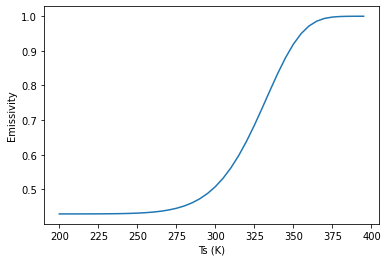

In [58]:
import matplotlib.pyplot as plt
import numpy as np

Lv=2.5e6
Rv=461.5

def tau(T):
    """optical depth as function of surface temperature"""
    return 0.56+0.07*np.exp(-Lv*(1/T-1/288)/Rv)


# vector of surface temperatures
Ts=np.arange(200,400,5)


# plot Tau
fig,ax=plt.subplots()

ax.plot(Ts,1-np.exp(-tau(Ts)))
ax.set_xlabel("Ts (K)")
ax.set_ylabel("Emissivity")

print(tau(288))

[[200 200 200 ... 200 200 200]
 [205 205 205 ... 205 205 205]
 [210 210 210 ... 210 210 210]
 ...
 [385 385 385 ... 385 385 385]
 [390 390 390 ... 390 390 390]
 [395 395 395 ... 395 395 395]] [[ 0.56004327  0.56004327  0.56004327 ...  0.56004327  0.56004327
   0.56004327]
 [ 0.56008377  0.56008377  0.56008377 ...  0.56008377  0.56008377
   0.56008377]
 [ 0.56015715  0.56015715  0.56015715 ...  0.56015715  0.56015715
   0.56015715]
 ...
 [19.99439386 19.99439386 19.99439386 ... 19.99439386 19.99439386
  19.99439386]
 [23.83627471 23.83627471 23.83627471 ... 23.83627471 23.83627471
  23.83627471]
 [28.31061386 28.31061386 28.31061386 ... 28.31061386 28.31061386
  28.31061386]]


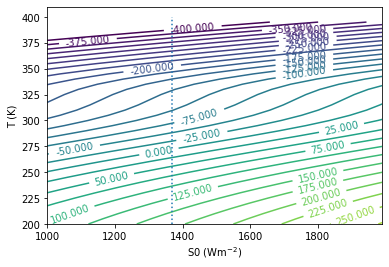

In [53]:
import matplotlib.pyplot as plt
import numpy as np

Lv=2.5e6
Rv=461.5
sigma=5.67e-8

def emiss(tau,lconst=False):
    """effective emissivity as function of optical depth"""
    if lconst:
        emiss=0.61 # 1-0.78/2
    else:
        emiss=0.5+np.exp(-tau)/2.
        #emiss=1/(1+tau)
    return emiss

# surface albedo with ice feedback
def alfa(T,lconst=False):
    if lconst: 
        albedo=0.3    
    else:
        albedo=0.45-0.25*np.tanh((T-272)/23)
    return albedo 

def cdTdt(S,T,aconst=False,econst=False):
    """define the energy balance equation in a function"""
    vtau=tau(T)
    print(T,vtau)
    return S*(1-alfa(T,lconst=aconst))/4 - emiss(tau(T),lconst=econst)*sigma*np.power(T,4)


# define the solar constant array
S0=np.arange(1000,2000,10)
Ts=np.arange(200,400,5)

T2d=np.tile(Ts,(len(S0),1)).transpose()
S2d=np.tile(S0,(len(Ts),1))


# contour plot
fig,ax=plt.subplots()
X=ax.contour(S2d,T2d,cdTdt(S2d,T2d,aconst=True),levels=np.arange(-400,400,25))
ax.clabel(X,fontsize=10)
ax.set_xlabel("S0 (Wm$^{-2}$)")
ax.set_ylabel("T (K)")

S0today=1370.
ax.vlines(S0today,200,400,linestyles="dotted")